<a href="https://colab.research.google.com/github/mkhairel/Students-Social-Media-Addiction/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Real Dasboard Students Social Media Addiction
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv
User uploaded file "Students Social Media Addiction.csv" with length 49821 bytes


Text(0, 0.5, 'Jam Sehari')

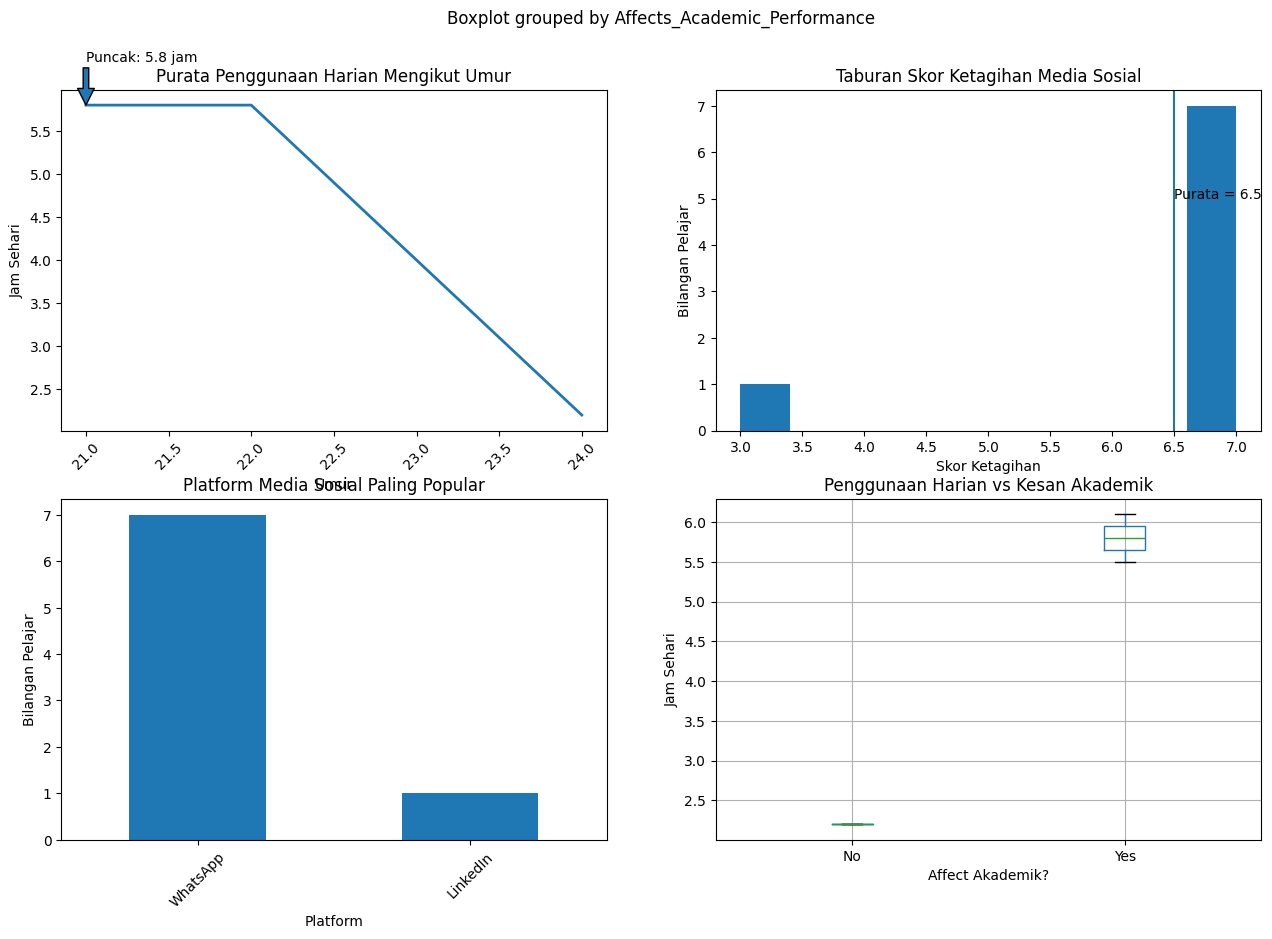

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Students Social Media Addiction.csv')

# ---- DATA PREPROCESSING ----
# Fokus kepada pelajar Malaysia sahaja
my_df = df[df['Country'] == 'Malaysia'].copy()

# Jika tiada responden Malaysia, kita guna keseluruhan dataset (backup plan)
if my_df.shape[0] == 0:
    print("Tiada data Malaysia — guna keseluruhan dataset sebagai proksi")
    my_df = df.copy()

# Cipta beberapa metrik tambahan (untuk dashboard lebih "real")
my_df['High_Usage'] = my_df['Avg_Daily_Usage_Hours'] >= 5

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# -------- Plot 1: Line Plot --------
age_usage = my_df.groupby('Age')['Avg_Daily_Usage_Hours'].mean()

age_usage.plot(kind='line', ax=axes[0,0], linewidth=2)
axes[0,0].set_title('Purata Penggunaan Harian Mengikut Umur')
axes[0,0].set_xlabel('Umur')
axes[0,0].set_ylabel('Jam Sehari')
axes[0,0].tick_params(axis='x', rotation=45)

# ANOTASI 1
max_age = age_usage.idxmax()
max_val = age_usage.max()
axes[0,0].annotate(f'Puncak: {max_val:.1f} jam',
                   xy=(max_age, max_val),
                   xytext=(max_age, max_val+0.5),
                   arrowprops=dict())
# -------- Plot 2: Histogram --------
my_df['Addicted_Score'].plot(kind='hist', bins=10, ax=axes[0,1])
axes[0,1].set_title('Taburan Skor Ketagihan Media Sosial')
axes[0,1].set_xlabel('Skor Ketagihan')
axes[0,1].set_ylabel('Bilangan Pelajar')

# ANOTASI 2
mean_addiction = my_df['Addicted_Score'].mean()
axes[0,1].axvline(mean_addiction)
axes[0,1].annotate(f'Purata = {mean_addiction:.1f}',
                   xy=(mean_addiction, 5))
# -------- Plot 3: Bar Plot --------
platform_counts = my_df['Most_Used_Platform'].value_counts()

platform_counts.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Platform Media Sosial Paling Popular')
axes[1,0].set_xlabel('Platform')
axes[1,0].set_ylabel('Bilangan Pelajar')
axes[1,0].tick_params(axis='x', rotation=45)

# -------- Plot 4: Box Plot --------
my_df.boxplot(column='Avg_Daily_Usage_Hours',
              by='Affects_Academic_Performance',
              ax=axes[1,1])

axes[1,1].set_title('Penggunaan Harian vs Kesan Akademik')
axes[1,1].set_xlabel('Affect Akademik?')
axes[1,1].set_ylabel('Jam Sehari')

